<a href="https://colab.research.google.com/github/yasminencib/atelier-git/blob/master/ML_is_here.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Myocardial infarction complications**

## Imports

In [ ]:
!pip install ucimlrepo

In [ ]:
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## BO & DSO


**les BO**                                                         
1.   Identifier les complications potentielles après un infarctus du myocarde        
  **DSO**                                                         
  *CConstruire un modèle de classification (ex. forêt aléatoire, SVM) capable de prédire les complications post-infarctus avec une précision d'au moins 85%.                                                                                                                
  

2.   Analyser l’impact des différents traitements sur la récupération des patients                                                                       
  **DSO**                                                         

 *Comparer l'efficacité des différents traitements en mesurant la réduction des complications chez les patients traités avec chaque option thérapeutique à l'aide de tests statistiques.                                               


3.  Optimiser les interventions de suivi post-infarctus pour réduire les complications.                                                           
   **DSO**                                                                      
 *Développer un modèle prédictif basé sur des séries temporelles pour identifier les moments critiques où les patients sont le plus à risque de complications après leur sortie de l'hôpital.

## Data Understanding

####1. Import Data

In [ ]:
# fetch dataset
myocardial_infarction_complications = fetch_ucirepo(id=579)

# data (as pandas dataframes)
df = myocardial_infarction_complications.data.features
y = myocardial_infarction_complications.data.targets

####2. Basic structure of the dataset

In [ ]:
print("Shape of the dataset:", df.shape)  # (Rows, Columns)
print("Column names:", df.columns.tolist())

Shape of the dataset: (1700, 111)
Column names: ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_1

In [ ]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


#### 3. Check for missing values


In [ ]:
print("Missing values in each column:")
# print(df.isnull().sum().tolist())
df.isnull().sum().tolist()

Missing values in each column:


[8,
 0,
 4,
 106,
 73,
 51,
 1628,
 9,
 8,
 248,
 54,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 11,
 10,
 10,
 7,
 7,
 7,
 7,
 7,
 1076,
 1076,
 267,
 267,
 12,
 15,
 14,
 12,
 12,
 12,
 83,
 80,
 80,
 72,
 1,
 152,
 152,
 152,
 152,
 152,
 152,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 369,
 371,
 375,
 375,
 284,
 285,
 1696,
 125,
 203,
 126,
 16,
 108,
 128,
 657,
 686,
 677,
 9,
 5,
 108,
 131,
 10,
 110,
 131,
 10,
 11,
 13,
 17,
 17,
 16,
 16]

-> There are columns that are completly missing
-> Others to fill missing values

#### 4. Data types of each column


In [ ]:
print("\nData types of each column:")
print(df.dtypes.tolist())


Data types of each column:
[dtype('float64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), d

-> All data is numerical

#### 5. Summary statistics for numerical columns


In [ ]:
print("\nSummary statistics for numerical columns:")
df.describe()


Summary statistics for numerical columns:


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
count,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,1452.000000,...,1690.000000,1590.000000,1569.000000,1690.000000,1689.000000,1687.000000,1683.000000,1683.000000,1684.000000,1684.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,3.340220,...,0.331953,0.113208,0.084767,0.283432,0.127294,0.666864,0.714795,0.743910,0.017815,0.202494
std,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,3.098646,...,0.628311,0.399514,0.355107,0.450798,0.333401,0.471474,0.451646,0.436602,0.132317,0.401978
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,7.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,7.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 6. Check for duplicate rows


In [ ]:
# 6. Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


#### 7. Check for outliers

In [ ]:
# Step 1: Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 2: Apply Z-Score for each numerical column
for col in numerical_cols:
    z_scores = np.abs(stats.zscore(df[col]))  # Apply z-score on each numerical column
    outliers_z = np.where(z_scores > 3)  # Z-scores greater than 3 are considered outliers
    print(f"Outliers detected at the following positions for {col} (row positions): {outliers_z[0]}")

    print("-----")

# Option: Drop rows with outliers based on Z-Score
# df_cleaned_z = df[(z_scores < 3).all(axis=1)]

# Check how many rows remain after removing outliers
# print(f"Remaining rows after outlier removal: {df_cleaned_z.shape[0]}")


Outliers detected at the following positions for AGE (row positions): []
-----
Outliers detected at the following positions for SEX (row positions): []
-----
Outliers detected at the following positions for INF_ANAM (row positions): []
-----
Outliers detected at the following positions for STENOK_AN (row positions): []
-----
Outliers detected at the following positions for FK_STENOK (row positions): []
-----
Outliers detected at the following positions for IBS_POST (row positions): []
-----
Outliers detected at the following positions for IBS_NASL (row positions): []
-----
Outliers detected at the following positions for GB (row positions): []
-----
Outliers detected at the following positions for SIM_GIPERT (row positions): []
-----
Outliers detected at the following positions for DLIT_AG (row positions): []
-----
Outliers detected at the following positions for ZSN_A (row positions): []
-----
Outliers detected at the following positions for nr_11 (row positions): []
-----
Outliers de

## Data Pre-Processing


In [ ]:
# 1. Handling Missing Values
# Delete columns with many missing values:
missing_values = df.isnull().sum()

for col in missing_values.index:
  if missing_values[col] > 600:
    df = df.drop(columns=[col])
print("Shape of the dataset:", df.shape)  # (Rows, Columns)


# Impute numerical columns with mean
# There is no categorical columns
df = df.fillna(df.mean())


# 2. Standardize Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

Shape of the dataset: (1700, 104)


## PCA

In [ ]:
# select only two components
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
X_pca2.shape
pca2.explained_variance_ratio_


array([0.03731184, 0.03139274])

--> You can see that both combined retains only  0.037+0.031=0.0.068 or 6% of important feature information



In [ ]:
# Use components such that 80% of variance is retained
pca = PCA(n_components=0.80)

In [ ]:
X_pca = pca.fit_transform(X_scaled)


In [ ]:
X_pca.shape


(1700, 62)

In [ ]:
pca.explained_variance_ratio_


array([0.03731184, 0.03139274, 0.0297114 , 0.02630846, 0.02343024,
       0.02093017, 0.01914349, 0.0173993 , 0.01695623, 0.01642539,
       0.01553071, 0.01537794, 0.01491557, 0.01466454, 0.01429117,
       0.01384476, 0.01349842, 0.0134053 , 0.01314033, 0.01297324,
       0.0126387 , 0.01253034, 0.01238012, 0.0121239 , 0.01204259,
       0.01184627, 0.01170962, 0.01151797, 0.01143282, 0.01127687,
       0.01114316, 0.01096626, 0.01081449, 0.0106437 , 0.01037405,
       0.01031562, 0.01021357, 0.010104  , 0.01004118, 0.00996263,
       0.00987324, 0.00979362, 0.00973126, 0.00963392, 0.00958154,
       0.00956434, 0.00933963, 0.00929547, 0.00916505, 0.00909523,
       0.00894455, 0.00884003, 0.00878867, 0.00865495, 0.00860094,
       0.00850065, 0.00843391, 0.00825455, 0.00813109, 0.00789476,
       0.00784989, 0.00778586])

In [ ]:
pca.n_components_

62

--> PCA created 62 components out of 111 original columns



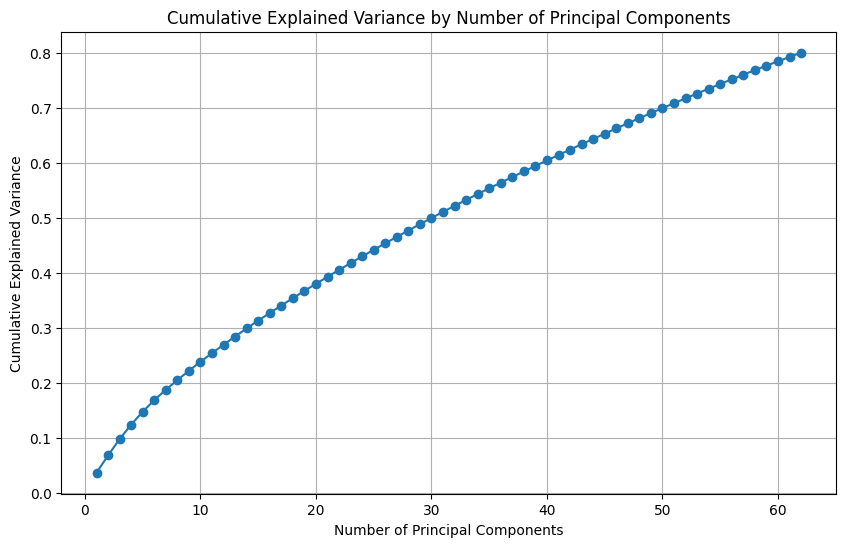

In [ ]:
#Plot the Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Step 5: Display the number of components selected
print(f"Number of components selected: {pca.n_components_}")
print(f"Explained variance ratio of the components: {pca.explained_variance_ratio_}")



Number of components selected: 62
Explained variance ratio of the components: [0.03731184 0.03139274 0.0297114  0.02630846 0.02343024 0.02093017
 0.01914349 0.0173993  0.01695623 0.01642539 0.01553071 0.01537794
 0.01491557 0.01466454 0.01429117 0.01384476 0.01349842 0.0134053
 0.01314033 0.01297324 0.0126387  0.01253034 0.01238012 0.0121239
 0.01204259 0.01184627 0.01170962 0.01151797 0.01143282 0.01127687
 0.01114316 0.01096626 0.01081449 0.0106437  0.01037405 0.01031562
 0.01021357 0.010104   0.01004118 0.00996263 0.00987324 0.00979362
 0.00973126 0.00963392 0.00958154 0.00956434 0.00933963 0.00929547
 0.00916505 0.00909523 0.00894455 0.00884003 0.00878867 0.00865495
 0.00860094 0.00850065 0.00843391 0.00825455 0.00813109 0.00789476
 0.00784989 0.00778586]


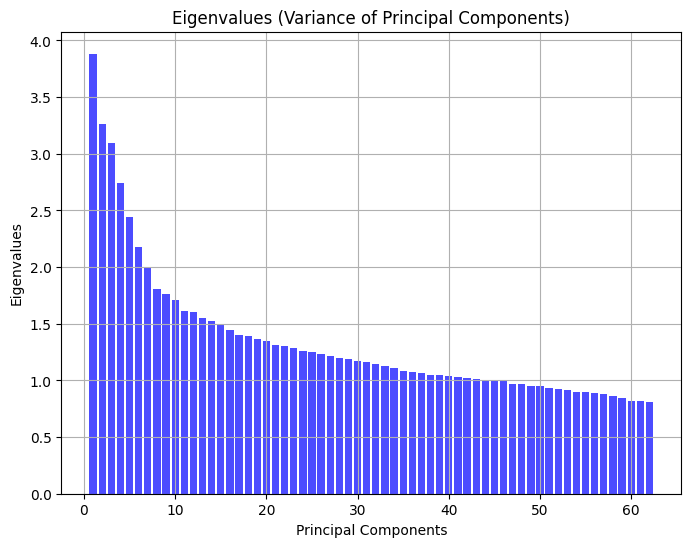

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the eigenvalues (variance explained by each component)
eigenvalues = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues (Variance of Principal Components)')
plt.grid(True)
plt.show()


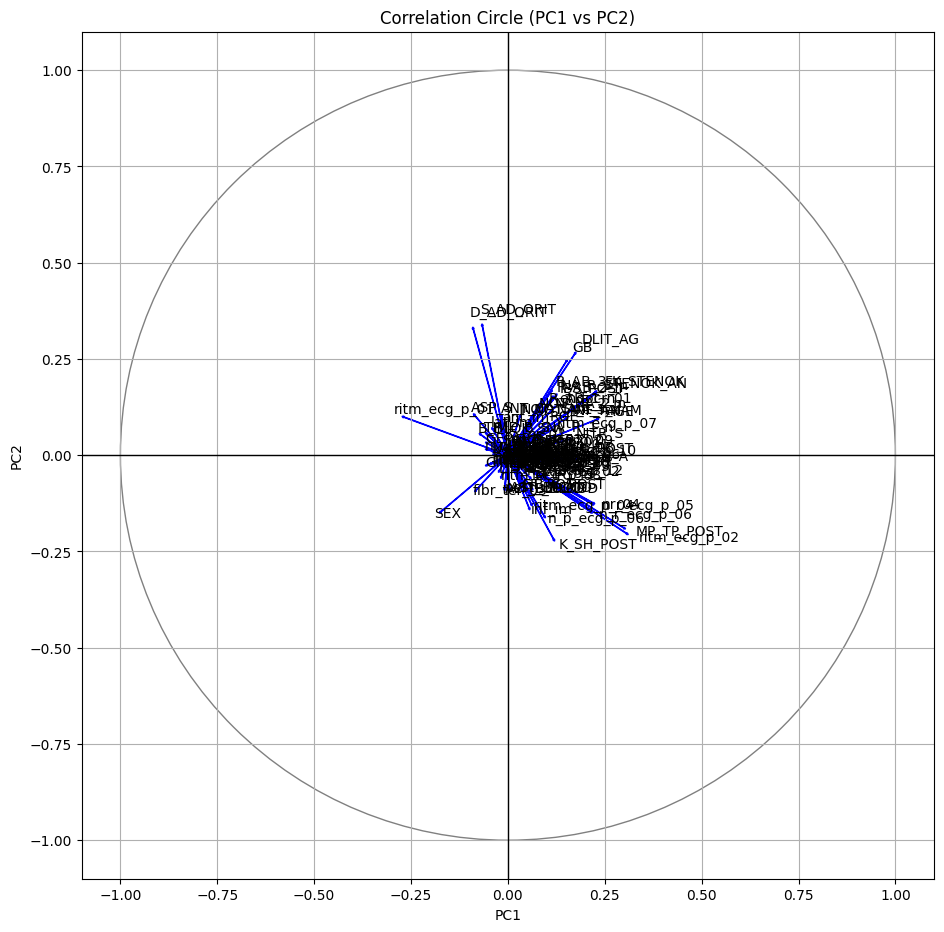

In [ ]:
# Plot the correlation circle for the first two principal components
def correlation_circle(pca, X_scaled):
    pcs = pca.components_
    features = X_scaled.columns
    fig, ax = plt.subplots(figsize=(11, 11))

    # Circle for reference
    circle = plt.Circle((0, 0), 1, color='gray', fill=False)
    ax.add_artist(circle)

    for i in range(pcs.shape[1]):
        plt.arrow(0, 0, pcs[0, i], pcs[1, i], head_width=0.005, head_length=0.005, color='blue')
        plt.text(pcs[0, i] * 1.1, pcs[1, i] * 1.1, features[i], color='black')

    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Correlation Circle (PC1 vs PC2)')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.show()

correlation_circle(pca, df)


<ipython-input-70-457e9c9fd818>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="yellow", cmap='coolwarm', alpha=0.6)


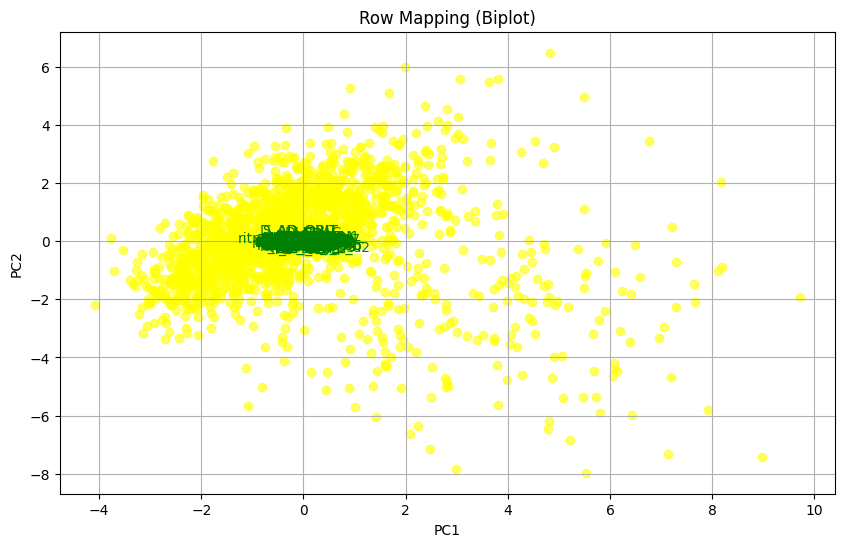

In [ ]:
from sklearn.decomposition import PCA

# PCA score plot (mapping rows to components)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="yellow", cmap='coolwarm', alpha=0.6)
plt.title('Row Mapping (Biplot)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# Adding variable vectors to the biplot
for i, feature in enumerate(df.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.1, pca.components_[1, i] * 1.1, feature, color='g', ha='center', va='center')

plt.show()
